# Funnel Chart

In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

In [1]:
from IPython.display import Image

In [7]:
d={'Phases':['Impressions','Clicks','Downloads','Purchase'],
  'Values':[1000000,500000,100000,10000]}

In [9]:
app_data=pd.DataFrame(d)
app_data

,Phases,Values
0,Impressions,1000000
1,Clicks,500000
2,Downloads,100000
3,Purchase,10000


In [10]:
phases=app_data['Phases']
values=app_data['Values']
colors=['blue','yellow','green','red']

In [11]:
num_phases=len(phases)
num_phases

4

In [12]:
plot_width=200
section_height=50
section_gap=10

In [13]:
unit_width=plot_width/max(values)
phase_widths=[int(value*unit_width) for value in values]
phase_widths

[200, 100, 20, 2]

In [14]:
height=section_height*num_phases+section_gap*(num_phases-1)
height

230

In [16]:
points=[phase_widths[0]/2,height,phase_widths[1]/2,height-section_height]
points

[100.0, 230, 50.0, 180]

In [17]:
path='M{0},{1}L{2},{3}L-{2},{3}L-{0},{1}Z'.format(*points)
path

'M100.0,230L50.0,180L-50.0,180L-100.0,230Z'

In [20]:
section={'type':'path',
        'path':path,
        'fillcolor':colors[0],
        'line':{'color':colors[0]}}

In [23]:
layout=go.Layout(shapes=[section])

In [24]:
fig=go.Figure(data=[{}],
             layout=layout)
offline.iplot(fig)

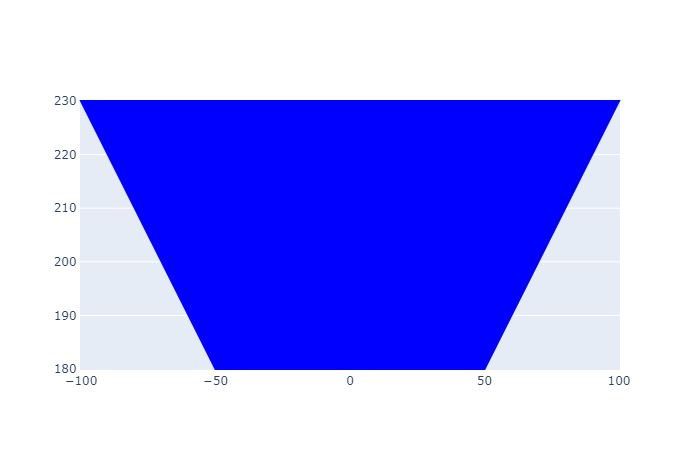

In [2]:
Image('newplot.png')

In [30]:
shapes=[]
path_list=[]
y_labels=[]

In [31]:
for i in range(num_phases):
    if (i==num_phases-1):
        points=[phase_widths[i]/2,height,phase_widths[i]/2,height-section_height]
    else:
        points=[phase_widths[i]/2,height,phase_widths[i+1]/2,height-section_height]
       
    path='M{0},{1}L{2},{3}L-{2},{3}L-{0},{1}Z'.format(*points)
    
    print('\n porints for phase %d=%s' %(i,points))
    print('path for phase %d=%s' %(i, path))
    
    path_list.append(path)
    y_labels.append(height-(section_height/2))
    height=height-(section_height+section_gap)
        
        


 porints for phase 0=[100.0, 230, 50.0, 180]
path for phase 0=M100.0,230L50.0,180L-50.0,180L-100.0,230Z

 porints for phase 1=[50.0, 170, 10.0, 120]
path for phase 1=M50.0,170L10.0,120L-10.0,120L-50.0,170Z

 porints for phase 2=[10.0, 110, 1.0, 60]
path for phase 2=M10.0,110L1.0,60L-1.0,60L-10.0,110Z

 porints for phase 3=[1.0, 50, 1.0, 0]
path for phase 3=M1.0,50L1.0,0L-1.0,0L-1.0,50Z


In [32]:
for i in range(num_phases):
    shape={'type':'path',
          'path':path_list[i],
          'fillcolor':colors[i],
          'line':{'color':colors[i]}}
    shapes.append(shape)
    
shapes

[{'type': 'path',
  'path': 'M100.0,230L50.0,180L-50.0,180L-100.0,230Z',
  'fillcolor': 'blue',
  'line': {'color': 'blue'}},
 {'type': 'path',
  'path': 'M50.0,170L10.0,120L-10.0,120L-50.0,170Z',
  'fillcolor': 'yellow',
  'line': {'color': 'yellow'}},
 {'type': 'path',
  'path': 'M10.0,110L1.0,60L-1.0,60L-10.0,110Z',
  'fillcolor': 'green',
  'line': {'color': 'green'}},
 {'type': 'path',
  'path': 'M1.0,50L1.0,0L-1.0,0L-1.0,50Z',
  'fillcolor': 'red',
  'line': {'color': 'red'}}]

In [33]:
label_trace=go.Scatter(x=[-170]*num_phases,
                      y=y_labels,
                      mode='text',
                      text=phases)

In [35]:
value_trace=go.Scatter(x=[-170]*num_phases,
                      y=y_labels,
                      mode='text',
                      text=values)

In [36]:
data=[label_trace,value_trace]

In [39]:
layout=go.Layout(title='<i><b>App Purchase Funnel</i></b>',
                titlefont=dict(size=15),
                shapes=shapes,
                showlegend=False,
                
                xaxis=dict(showticklabels=False,
                          zeroline=True),
                yaxis=dict(showticklabels=False,
                          zeroline=True))

In [40]:
fig=go.Figure(data=data,layout=layout)
offline.iplot(fig)

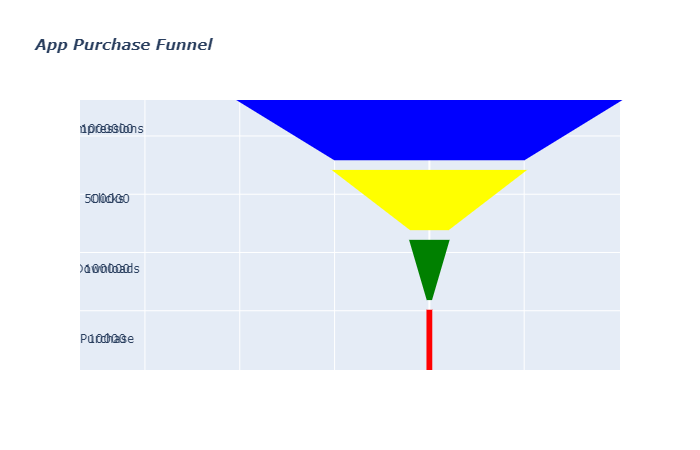

In [3]:
Image('newplot2.png')